In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

In [3]:
xls = pd.ExcelFile('ts.xlsx')

In [4]:
df = pd.read_excel(xls, 'timeseries')

In [5]:
df.groupby('CHANGE_USD').count()['DATE']

CHANGE_USD
neg      19
norm    690
pos      22
Name: DATE, dtype: int64

In [6]:
df.groupby('CHANGE_EUR').count()['DATE']

CHANGE_EUR
neg      38
norm    655
pos      38
Name: DATE, dtype: int64

In [7]:
def change_currency_usd(df):
    change = False
    cnt = 0
    
    for i, val in enumerate(df['CHANGE_USD']):
        if val == 'neg' or val == 'pos':
            unknown = val
            change = True
            cnt = 0
            #print(i, val)
        if val == 'norm' and change == True and df['CALENDAR'].iloc[i] == 'NORMAL' and cnt !=2:
            cnt+=1
            df['CHANGE_USD'].iloc[i] = unknown
        if cnt == 2:
            change = False
            
    return df['CHANGE_USD']    

def change_currency_eur(df):
    change = False
    cnt = 0
    
    for i, val in enumerate(df['CHANGE_EUR']):
        if val == 'neg' or val == 'pos':
            unknown = val
            change = True
            cnt = 0
            #print(i, val)
        if val == 'norm' and change == True and df['CALENDAR'].iloc[i] == 'NORMAL' and cnt !=2:
            cnt+=1
            df['CHANGE_EUR'].iloc[i] = unknown
        if cnt == 2:
            change = False
            
    return df['CHANGE_EUR']

def general_currency_change(df):
    for i in range(len(df)):
        if df['CHANGE_USD'].iloc[i] == 'neg' or df['CHANGE_EUR'].iloc[i] == 'neg':
            df['USD_EUR_CHANGE'].iloc[i] = 'neg'
        elif df['CHANGE_USD'].iloc[i] == 'pos' or df['CHANGE_EUR'].iloc[i] == 'pos':
             df['USD_EUR_CHANGE'].iloc[i] = 'pos'        
            
    return df['USD_EUR_CHANGE']        

In [8]:
df['CHANGE_USD'] = change_currency_usd(df)
df['CHANGE_EUR'] = change_currency_eur(df)

In [9]:
df.groupby('CHANGE_USD').count()['DATE']

CHANGE_USD
neg      47
norm    635
pos      49
Name: DATE, dtype: int64

In [10]:
df.groupby('CHANGE_EUR').count()['DATE']

CHANGE_EUR
neg      94
norm    541
pos      96
Name: DATE, dtype: int64

In [11]:
df['USD_EUR_CHANGE'] = 'norm'
df['USD_EUR_CHANGE'] = general_currency_change(df)

In [12]:
df.groupby('USD_EUR_CHANGE').count()['DATE']

USD_EUR_CHANGE
neg     109
norm    519
pos     103
Name: DATE, dtype: int64

In [13]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [14]:
df['YEAR'] = df['DATE'].apply(lambda x: x.year)

In [15]:
df.head()

,DATE,IN_FOR,OUT_FOR,NET_FOR,IN_KZT,OUT_KZT,NET_KZT,NET_TOTAL,USD,EUR,...,DELTA_OUT_KZT,DELTA_NET_KZT,DELTA_NET_TOTAL,CALENDAR,INTEREST_RATE_FOR,INTEREST_RATE_KZT,CHANGE_USD,CHANGE_EUR,USD_EUR_CHANGE,YEAR
0,2016-01-01,0,122953,-122953,1899647,1584705,314942,191989,340.01,371.46,...,0.000000,0.000000,0.000000,HOLIDAY,0.024,0.122,norm,norm,norm,2016
1,2016-01-02,2942,115059,-112117,2706416,2315761,390655,278538,340.01,371.46,...,0.461320,0.240403,0.450802,HOLIDAY,0.024,0.122,norm,norm,norm,2016
2,2016-01-03,263,147905,-147642,3548855,2971268,577587,429945,340.01,371.46,...,0.283063,0.478509,0.543578,NORMAL,0.024,0.122,norm,norm,norm,2016
3,2016-01-04,13533594,9363025,4170569,23528654,11716898,11811756,15982325,340.01,371.46,...,2.943400,19.450176,36.172952,NORMAL,0.024,0.122,norm,norm,norm,2016
4,2016-01-05,36769881,32769452,4000429,37289979,22565273,14724706,18725135,340.01,371.46,...,0.925874,0.246614,0.171615,NORMAL,0.024,0.122,norm,norm,norm,2016


In [16]:
df.groupby('CHANGE_USD').count()['DATE']

CHANGE_USD
neg      47
norm    635
pos      49
Name: DATE, dtype: int64

In [17]:
import seaborn as sns

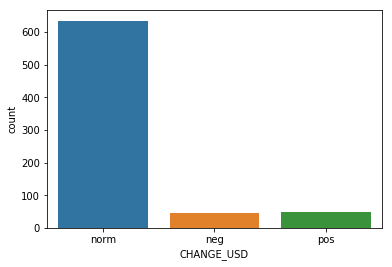

In [18]:
sns.countplot(x='CHANGE_USD', data=df)

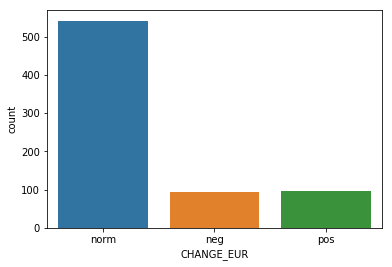

In [19]:
sns.countplot(x='CHANGE_EUR', data=df)

In [20]:
df_2016 = df[df['YEAR'] == 2016]

In [21]:
df_2017 = df[df['YEAR'] == 2017]

CHANGE_EUR
neg     AxesSubplot(0.125,0.125;0.775x0.755)
norm    AxesSubplot(0.125,0.125;0.775x0.755)
pos     AxesSubplot(0.125,0.125;0.775x0.755)
Name: IN_FOR, dtype: object

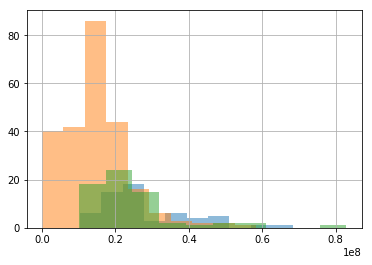

In [22]:
df_2016.groupby('CHANGE_EUR')['IN_FOR'].hist(alpha=0.5)

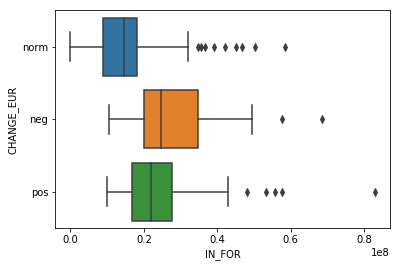

In [23]:
sns.boxplot(x='IN_FOR',y='CHANGE_EUR', data=df_2016, orient='h')

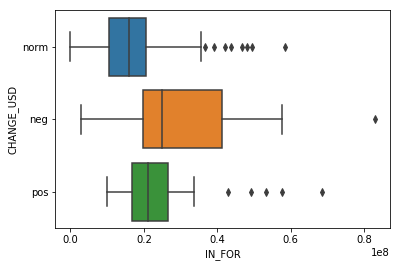

In [24]:
sns.boxplot(x='IN_FOR',y='CHANGE_USD', data=df_2016, orient='h')

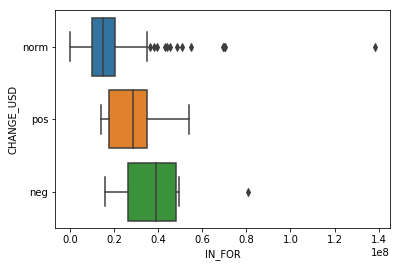

In [25]:
sns.boxplot(x='IN_FOR',y='CHANGE_USD', data=df_2017, orient='h')

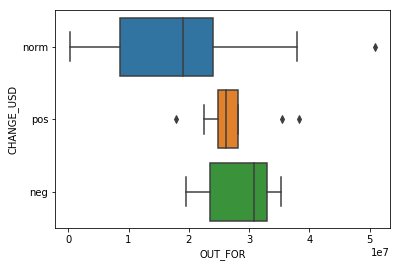

In [26]:
sns.boxplot(x='OUT_FOR',y='CHANGE_USD', data=df_2017, orient='h')

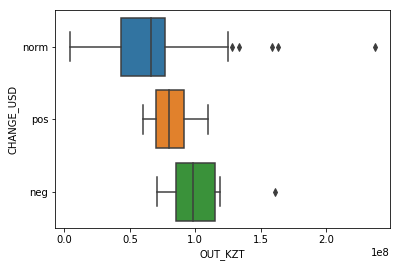

In [27]:
sns.boxplot(x='OUT_KZT',y='CHANGE_USD', data=df_2017, orient='h')

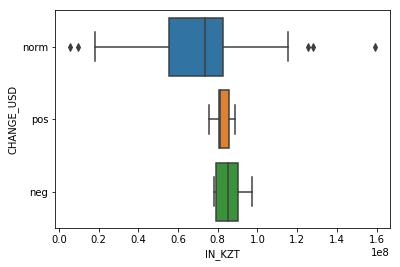

In [28]:
sns.boxplot(x='IN_KZT',y='CHANGE_USD', data=df_2017, orient='h')

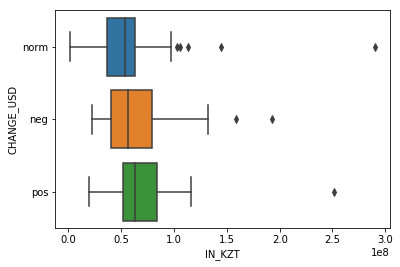

In [29]:
sns.boxplot(x='IN_KZT',y='CHANGE_USD', data=df_2016, orient='h')

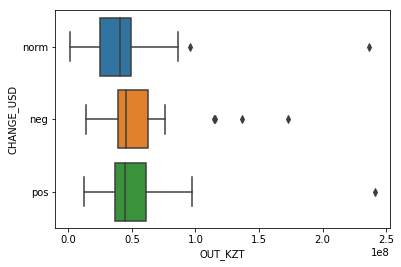

In [30]:
sns.boxplot(x='OUT_KZT',y='CHANGE_USD', data=df_2016, orient='h')

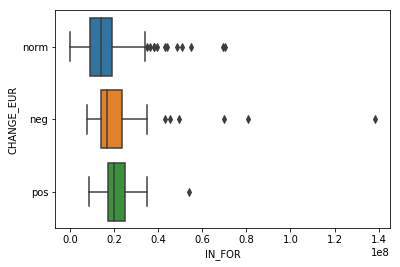

In [31]:
sns.boxplot(x='IN_FOR',y='CHANGE_EUR', data=df_2017, orient='h')

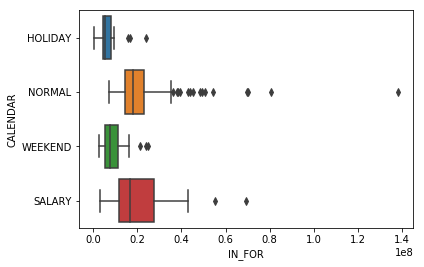

In [32]:
sns.boxplot(x='IN_FOR',y='CALENDAR', data=df_2017, orient='h')

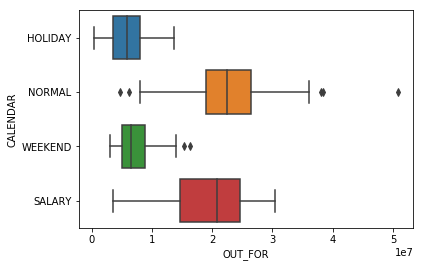

In [33]:
sns.boxplot(x='OUT_FOR',y='CALENDAR', data=df_2017, orient='h')

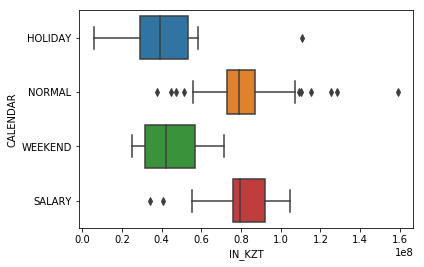

In [34]:
sns.boxplot(x='IN_KZT',y='CALENDAR', data=df_2017, orient='h')

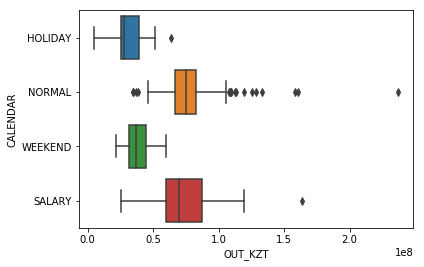

In [35]:
sns.boxplot(x='OUT_KZT',y='CALENDAR', data=df_2017, orient='h')

/Users/Daniyar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


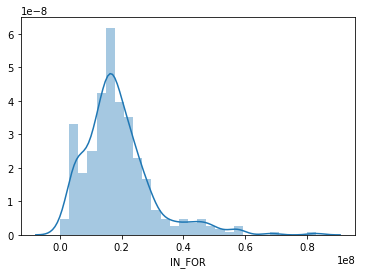

In [36]:
sns.distplot(df_2016['IN_FOR'])
#sns.distplot(df_2017['IN_FOR'])

In [37]:
df_2016.shape

(366, 26)

In [38]:
df.columns

Index(['DATE', 'IN_FOR', 'OUT_FOR', 'NET_FOR', 'IN_KZT', 'OUT_KZT', 'NET_KZT',
       'NET_TOTAL', 'USD', 'EUR', 'DELTA_NET_USD', 'DELTA_NET_EUR',
       'DELTA_IN_FOR', 'DELTA_OUT_FOR', 'DELTA_NET_FOR', 'DELTA_IN_KZT',
       'DELTA_OUT_KZT', 'DELTA_NET_KZT', 'DELTA_NET_TOTAL', 'CALENDAR',
       'INTEREST_RATE_FOR', 'INTEREST_RATE_KZT', 'CHANGE_USD', 'CHANGE_EUR',
       'USD_EUR_CHANGE', 'YEAR'],
      dtype='object')

In [39]:
df_2017.shape

(365, 26)

In [40]:
df_kzt = df[['IN_KZT', 'OUT_KZT', 'NET_KZT', 
             'USD', 'EUR', 'DELTA_NET_USD', 'DELTA_NET_EUR',
             'DELTA_IN_KZT', 'DELTA_OUT_KZT', 'DELTA_NET_KZT', 'CALENDAR',
             'INTEREST_RATE_KZT', 'CHANGE_USD', 'CHANGE_EUR', 'YEAR', 'USD_EUR_CHANGE']
           ]

df_for = df[['IN_FOR', 'OUT_FOR', 'NET_FOR', 
             'USD', 'EUR', 'DELTA_NET_USD', 'DELTA_NET_EUR',
             'DELTA_IN_FOR', 'DELTA_OUT_FOR', 'DELTA_NET_FOR', 'CALENDAR',
             'INTEREST_RATE_FOR', 'CHANGE_USD', 'CHANGE_EUR','YEAR', 'USD_EUR_CHANGE']
           ]

In [41]:
df_kzt_dummies = pd.get_dummies(df_kzt)

In [42]:
df_kzt_dummies.head()

,IN_KZT,OUT_KZT,NET_KZT,USD,EUR,DELTA_NET_USD,DELTA_NET_EUR,DELTA_IN_KZT,DELTA_OUT_KZT,DELTA_NET_KZT,...,CALENDAR_WEEKEND,CHANGE_USD_neg,CHANGE_USD_norm,CHANGE_USD_pos,CHANGE_EUR_neg,CHANGE_EUR_norm,CHANGE_EUR_pos,USD_EUR_CHANGE_neg,USD_EUR_CHANGE_norm,USD_EUR_CHANGE_pos
0,1899647,1584705,314942,340.01,371.46,0.0,0.0,0.000000,0.000000,0.000000,...,0,0,1,0,0,1,0,0,1,0
1,2706416,2315761,390655,340.01,371.46,0.0,0.0,0.424694,0.461320,0.240403,...,0,0,1,0,0,1,0,0,1,0
2,3548855,2971268,577587,340.01,371.46,0.0,0.0,0.311275,0.283063,0.478509,...,0,0,1,0,0,1,0,0,1,0
3,23528654,11716898,11811756,340.01,371.46,0.0,0.0,5.629928,2.943400,19.450176,...,0,0,1,0,0,1,0,0,1,0
4,37289979,22565273,14724706,340.01,371.46,0.0,0.0,0.584875,0.925874,0.246614,...,0,0,1,0,0,1,0,0,1,0


In [43]:
import matplotlib.pyplot as plt

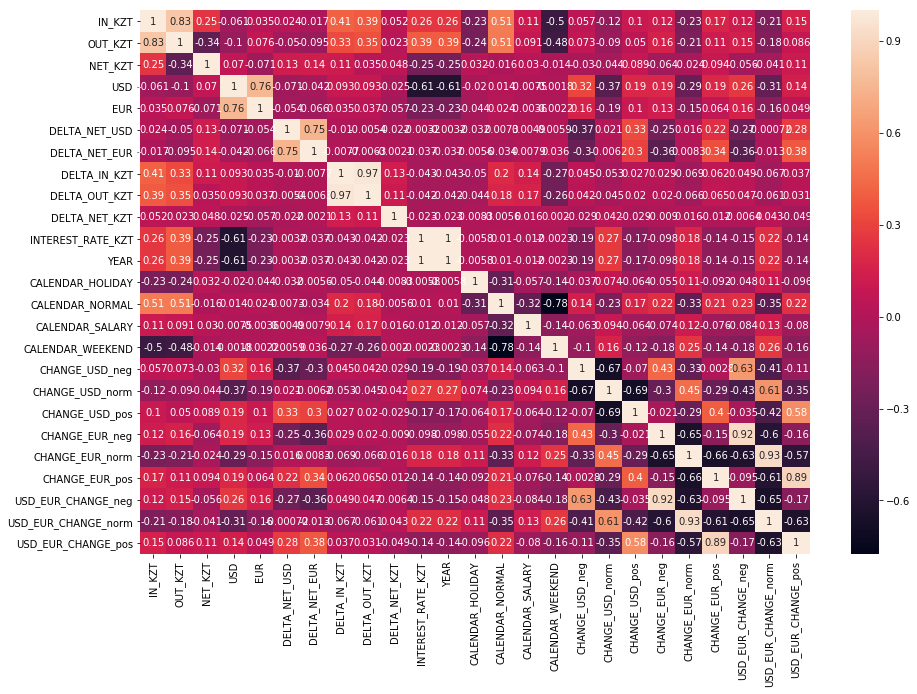

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_kzt_dummies.corr(),annot=True)

In [45]:
df_for_dummies = pd.get_dummies(df_for)
df_for_dummies.head()

,IN_FOR,OUT_FOR,NET_FOR,USD,EUR,DELTA_NET_USD,DELTA_NET_EUR,DELTA_IN_FOR,DELTA_OUT_FOR,DELTA_NET_FOR,...,CALENDAR_WEEKEND,CHANGE_USD_neg,CHANGE_USD_norm,CHANGE_USD_pos,CHANGE_EUR_neg,CHANGE_EUR_norm,CHANGE_EUR_pos,USD_EUR_CHANGE_neg,USD_EUR_CHANGE_norm,USD_EUR_CHANGE_pos
0,0,122953,-122953,340.01,371.46,0.0,0.0,0.000000,0.000000,0.000000,...,0,0,1,0,0,1,0,0,1,0
1,2942,115059,-112117,340.01,371.46,0.0,0.0,0.000000,-0.064203,0.088131,...,0,0,1,0,0,1,0,0,1,0
2,263,147905,-147642,340.01,371.46,0.0,0.0,-0.910605,0.285471,-0.316856,...,0,0,1,0,0,1,0,0,1,0
3,13533594,9363025,4170569,340.01,371.46,0.0,0.0,51457.532319,62.304317,29.247850,...,0,0,1,0,0,1,0,0,1,0
4,36769881,32769452,4000429,340.01,371.46,0.0,0.0,1.716934,2.499879,0.040795,...,0,0,1,0,0,1,0,0,1,0


In [46]:
df_for_dummies.columns

Index(['IN_FOR', 'OUT_FOR', 'NET_FOR', 'USD', 'EUR', 'DELTA_NET_USD',
       'DELTA_NET_EUR', 'DELTA_IN_FOR', 'DELTA_OUT_FOR', 'DELTA_NET_FOR',
       'INTEREST_RATE_FOR', 'YEAR', 'CALENDAR_HOLIDAY', 'CALENDAR_NORMAL',
       'CALENDAR_SALARY', 'CALENDAR_WEEKEND', 'CHANGE_USD_neg',
       'CHANGE_USD_norm', 'CHANGE_USD_pos', 'CHANGE_EUR_neg',
       'CHANGE_EUR_norm', 'CHANGE_EUR_pos', 'USD_EUR_CHANGE_neg',
       'USD_EUR_CHANGE_norm', 'USD_EUR_CHANGE_pos'],
      dtype='object')

In [47]:
df_for_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 25 columns):
IN_FOR                 731 non-null int64
OUT_FOR                731 non-null int64
NET_FOR                731 non-null int64
USD                    731 non-null float64
EUR                    731 non-null float64
DELTA_NET_USD          731 non-null float64
DELTA_NET_EUR          731 non-null float64
DELTA_IN_FOR           731 non-null float64
DELTA_OUT_FOR          731 non-null float64
DELTA_NET_FOR          731 non-null float64
INTEREST_RATE_FOR      731 non-null float64
YEAR                   731 non-null int64
CALENDAR_HOLIDAY       731 non-null uint8
CALENDAR_NORMAL        731 non-null uint8
CALENDAR_SALARY        731 non-null uint8
CALENDAR_WEEKEND       731 non-null uint8
CHANGE_USD_neg         731 non-null uint8
CHANGE_USD_norm        731 non-null uint8
CHANGE_USD_pos         731 non-null uint8
CHANGE_EUR_neg         731 non-null uint8
CHANGE_EUR_norm        731 non-null uin

## Model

### IN_FOR model

In [48]:
df_in_for = df_for_dummies[['IN_FOR', 'CALENDAR_HOLIDAY', 'CALENDAR_NORMAL','CALENDAR_SALARY', 'CALENDAR_WEEKEND', 
                           'USD_EUR_CHANGE_neg', 'USD_EUR_CHANGE_norm', 'USD_EUR_CHANGE_pos']]
df_in_for.head()

,IN_FOR,CALENDAR_HOLIDAY,CALENDAR_NORMAL,CALENDAR_SALARY,CALENDAR_WEEKEND,USD_EUR_CHANGE_neg,USD_EUR_CHANGE_norm,USD_EUR_CHANGE_pos
0,0,1,0,0,0,0,1,0
1,2942,1,0,0,0,0,1,0
2,263,0,1,0,0,0,1,0
3,13533594,0,1,0,0,0,1,0
4,36769881,0,1,0,0,0,1,0


In [49]:
df_in_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
IN_FOR                 731 non-null int64
CALENDAR_HOLIDAY       731 non-null uint8
CALENDAR_NORMAL        731 non-null uint8
CALENDAR_SALARY        731 non-null uint8
CALENDAR_WEEKEND       731 non-null uint8
USD_EUR_CHANGE_neg     731 non-null uint8
USD_EUR_CHANGE_norm    731 non-null uint8
USD_EUR_CHANGE_pos     731 non-null uint8
dtypes: int64(1), uint8(7)
memory usage: 10.8 KB


In [50]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_log_error, mean_absolute_error

In [51]:
X = df_in_for.drop('IN_FOR', axis = 1)
y = df_in_for['IN_FOR']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
prediction = model.predict(X_test)

In [56]:
prediction

array([22422470.28457495, 19060522.7387507 , 28529158.86004384,
       19060522.7387507 , 19060522.7387507 , 28529158.86004384,
       18562854.77980715, 19060522.7387507 ,  6235373.20737876,
       19060522.7387507 ,  9094218.65851401, 19060522.7387507 ,
        9094218.65851401, 19060522.7387507 , 28529158.86004384,
       22422470.28457495, 18562854.77980715,  9094218.65851401,
       19060522.7387507 , 28529158.86004384, 19060522.7387507 ,
       23418472.31610512,  9094218.65851401,  9094218.65851401,
       22422470.28457495, 12456166.20433826,  9094218.65851401,
       28529158.86004384, 19060522.7387507 , 19060522.7387507 ,
       19060522.7387507 , 19060522.7387507 ,  6235373.20737876,
       20056524.77028086, 22422470.28457495,  9094218.65851401,
       28529158.86004384, 22422470.28457495,  9094218.65851401,
       19060522.7387507 , 22422470.28457495, 20056524.77028086,
        9094218.65851401, 19060522.7387507 , 19060522.7387507 ,
       19060522.7387507 , 20056524.77028

/Users/Daniyar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


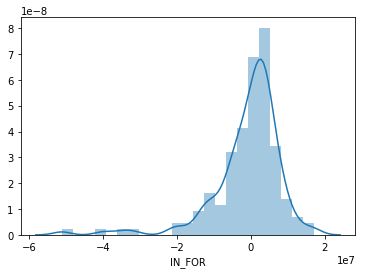

In [57]:

sns.distplot(prediction - y_test)

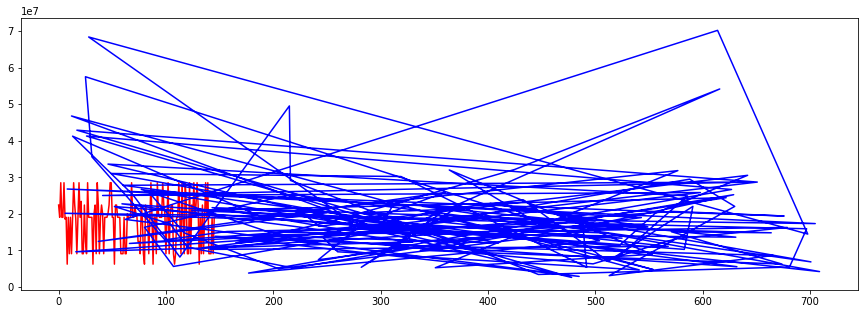

In [58]:
plt.figure(figsize=(15, 5))
plt.plot(prediction, color = 'red')
plt.plot(y_test, color = 'blue')
plt.show()

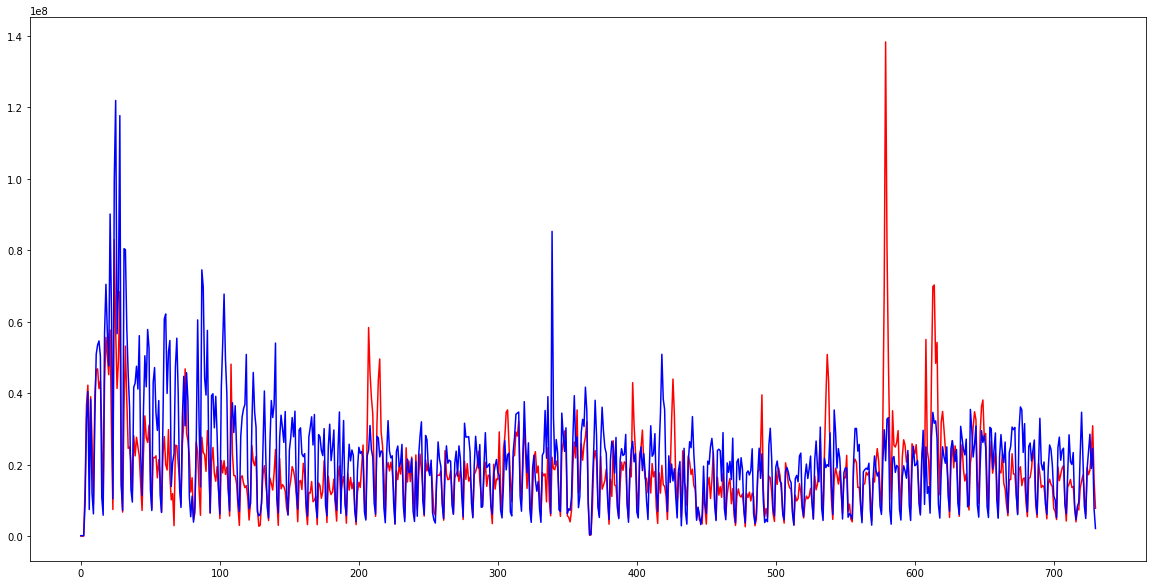

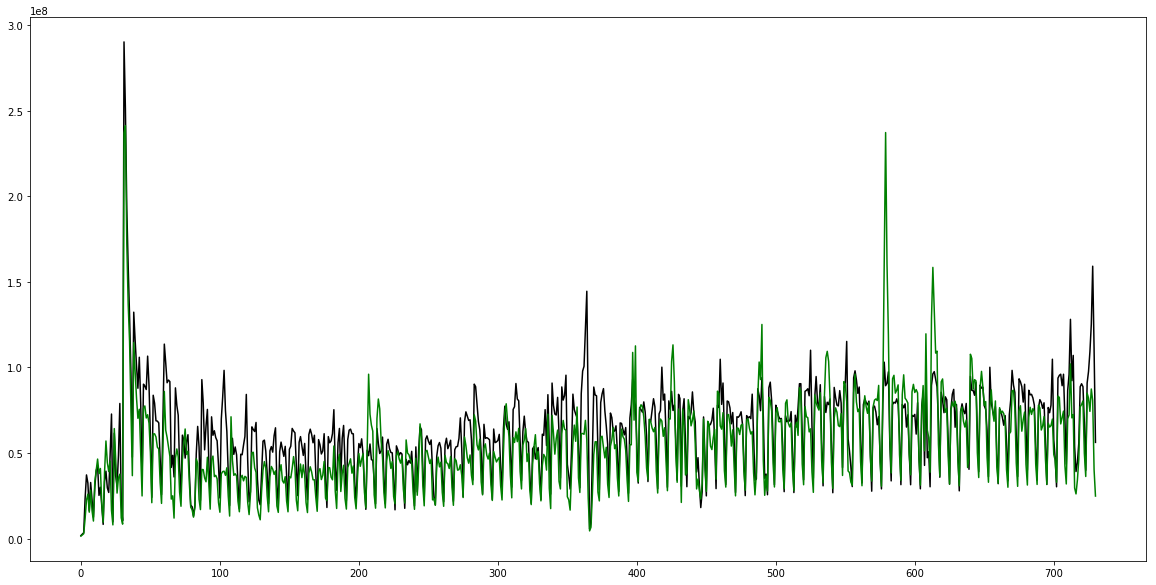

In [59]:
plt.figure(figsize=(20, 10))
plt.plot(df_for_dummies['IN_FOR'], color = 'red')
plt.plot(df_for_dummies['OUT_FOR'], color = 'blue')
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(df_kzt_dummies['IN_KZT'], color = 'black')
plt.plot(df_kzt_dummies['OUT_KZT'], color = 'green')
plt.show()

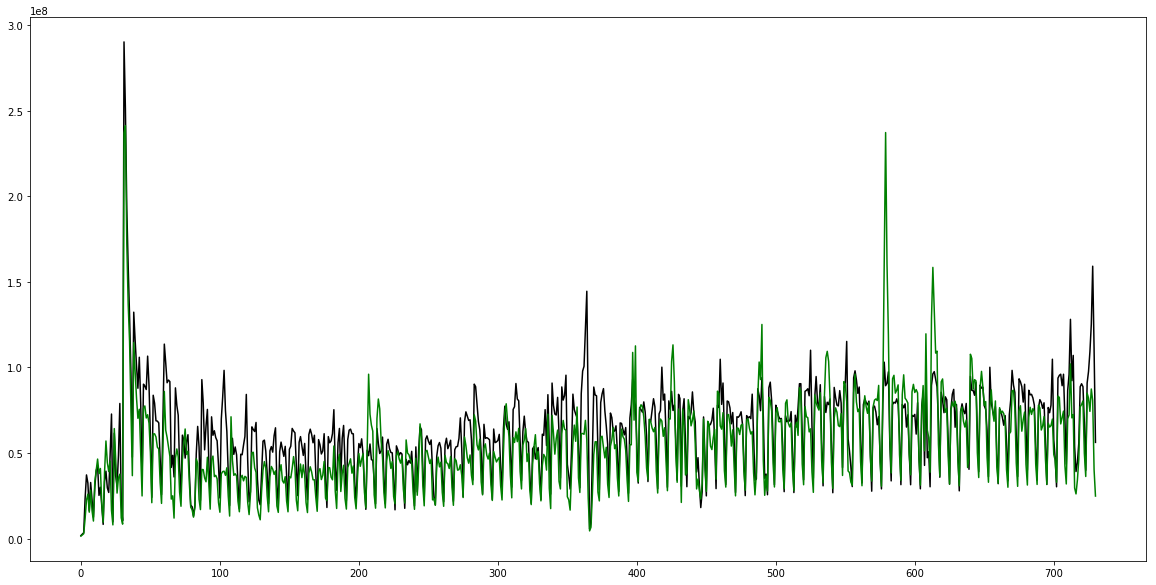

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(df_kzt_dummies['IN_KZT'], color = 'black')
plt.plot(df_kzt_dummies['OUT_KZT'], color = 'green')
plt.show()

In [61]:
# r2 score
r2_score(y_test, prediction)

0.3518780914246933

In [62]:
# MSE
mean_squared_error(y_test, prediction)

88023574320501.62

In [63]:
# EXP
explained_variance_score(y_test, prediction)

0.3571839084438455

In [64]:
# MSLE
mean_squared_log_error(y_test, prediction)

0.20295339751795874

In [65]:
mean_absolute_error(y_test, prediction)

6116102.231981807

In [66]:
y_test.mean()

18813716.14285714

In [67]:
prediction.mean()

17964834.224496946

In [68]:
print(y_test.mean() / mean_absolute_error(y_test, prediction), prediction.mean() / mean_absolute_error(y_test, prediction))

3.0760957598906766 2.9373011671643985


In [69]:
y_test.max()

70238676

In [70]:
df_in_for

,IN_FOR,CALENDAR_HOLIDAY,CALENDAR_NORMAL,CALENDAR_SALARY,CALENDAR_WEEKEND,USD_EUR_CHANGE_neg,USD_EUR_CHANGE_norm,USD_EUR_CHANGE_pos
0,0,1,0,0,0,0,1,0
1,2942,1,0,0,0,0,1,0
2,263,0,1,0,0,0,1,0
3,13533594,0,1,0,0,0,1,0
4,36769881,0,1,0,0,0,1,0
5,42232107,0,1,0,0,0,1,0
6,20162470,1,0,0,0,0,1,0
7,38992389,0,1,0,0,0,1,0
8,26803474,0,0,0,1,1,0,0
9,8851527,0,0,0,1,0,1,0


## Remove outliers

In [71]:
df_in_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
IN_FOR                 731 non-null int64
CALENDAR_HOLIDAY       731 non-null uint8
CALENDAR_NORMAL        731 non-null uint8
CALENDAR_SALARY        731 non-null uint8
CALENDAR_WEEKEND       731 non-null uint8
USD_EUR_CHANGE_neg     731 non-null uint8
USD_EUR_CHANGE_norm    731 non-null uint8
USD_EUR_CHANGE_pos     731 non-null uint8
dtypes: int64(1), uint8(7)
memory usage: 10.8 KB


In [72]:
df_in_for_train = df_in_for[:680]
df_in_for_test = df_in_for[680:]

/Users/Daniyar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


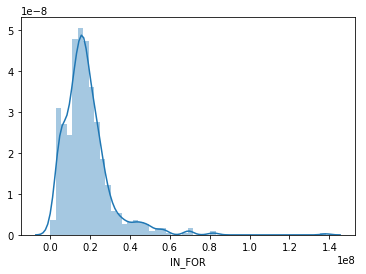

In [73]:
sns.distplot(df_in_for_train['IN_FOR'])

In [74]:
x = df_in_for_train['IN_FOR'].std()*3

In [75]:
df_in_for_train[df_in_for_train['IN_FOR'] > x].count()

IN_FOR                 43
CALENDAR_HOLIDAY       43
CALENDAR_NORMAL        43
CALENDAR_SALARY        43
CALENDAR_WEEKEND       43
USD_EUR_CHANGE_neg     43
USD_EUR_CHANGE_norm    43
USD_EUR_CHANGE_pos     43
dtype: int64

In [76]:
df_in_for_train = df_in_for_train[df_in_for_train['IN_FOR'] < x]

/Users/Daniyar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


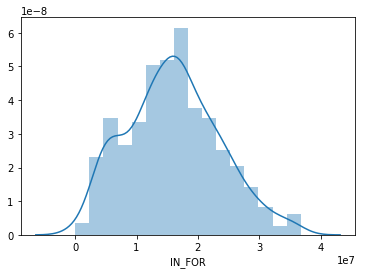

In [77]:
sns.distplot(df_in_for_train['IN_FOR'])

In [78]:
df_in_for_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 679
Data columns (total 8 columns):
IN_FOR                 637 non-null int64
CALENDAR_HOLIDAY       637 non-null uint8
CALENDAR_NORMAL        637 non-null uint8
CALENDAR_SALARY        637 non-null uint8
CALENDAR_WEEKEND       637 non-null uint8
USD_EUR_CHANGE_neg     637 non-null uint8
USD_EUR_CHANGE_norm    637 non-null uint8
USD_EUR_CHANGE_pos     637 non-null uint8
dtypes: int64(1), uint8(7)
memory usage: 14.3 KB


In [79]:
X_train = df_in_for_train.drop('IN_FOR',axis=1)
y_train = df_in_for_train['IN_FOR']

In [80]:
y_train.reset_index(drop=True,inplace=True)

In [81]:
X_test = df_in_for_test.drop('IN_FOR', axis=1)
y_test = df_in_for_test['IN_FOR']

In [82]:
y_test.reset_index(drop=True,inplace=True)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
prediction = model.predict(X_test)

In [85]:
for i in range(5):
    print(y_test.iloc[i], prediction[i])

9373426 9175040.0
5452144 9175040.0
16094583 18087936.0
16414107 18087936.0
18947640 18087936.0


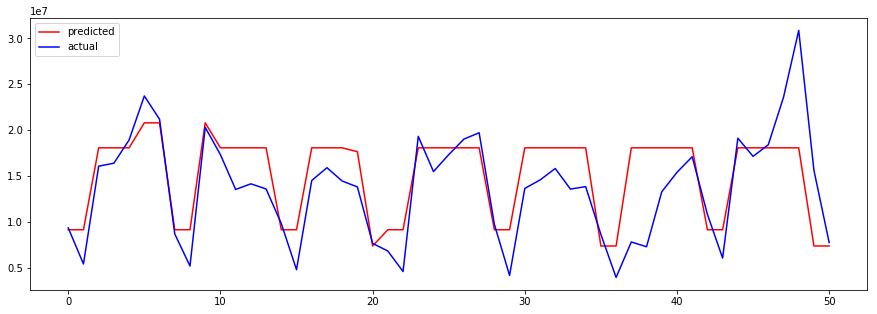

In [95]:
plt.figure(figsize=(15, 5))
plt.plot(prediction, color = 'red',label='predicted')
plt.plot(y_test, color = 'blue', label='actual')
plt.legend()
plt.show()

In [96]:
# r2 score
print(r2_score(y_test, prediction))

# MSE
print(mean_squared_error(y_test, prediction))

# RMSE
print(np.sqrt(mean_squared_error(y_test, prediction)))

# EXP
print(explained_variance_score(y_test, prediction))

# MSLE
print(mean_squared_log_error(y_test, prediction))

print(mean_absolute_error(y_test, prediction))

0.5015348264874714
16592454258509.393
4073383.6375315045
0.5637680078486
0.11997896094831854
3045577.470588235


without calendar

In [97]:
df_in_for_train.head()

,IN_FOR,CALENDAR_HOLIDAY,CALENDAR_NORMAL,CALENDAR_SALARY,CALENDAR_WEEKEND,USD_EUR_CHANGE_neg,USD_EUR_CHANGE_norm,USD_EUR_CHANGE_pos
0,0,1,0,0,0,0,1,0
1,2942,1,0,0,0,0,1,0
2,263,0,1,0,0,0,1,0
3,13533594,0,1,0,0,0,1,0
4,36769881,0,1,0,0,0,1,0


/Users/Daniyar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Daniyar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 679
Data columns (total 4 columns):
IN_FOR                 637 non-null int64
USD_EUR_CHANGE_neg     637 non-null uint8
USD_EUR_CHANGE_norm    637 non-null uint8
USD_EUR_CHANGE_pos     637 non-null uint8
dtypes: int64(1), uint8(3)
memory usage: 11.8 KB
9373426 14680064.0
5452144 14680064.0
16094583 14680064.0
16414107 14680064.0
18947640 14680064.0


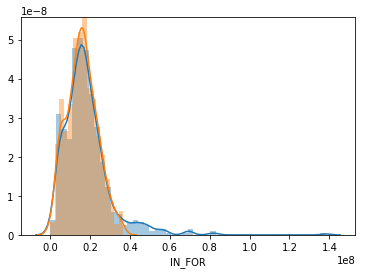

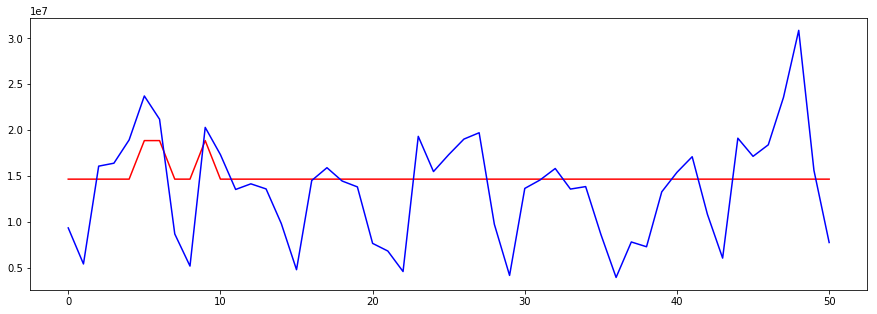

In [98]:
df_in_for_train = df_in_for[:680]
df_in_for_test = df_in_for[680:]

df_in_for_train.drop(['CALENDAR_HOLIDAY', 'CALENDAR_NORMAL',
                      'CALENDAR_SALARY', 'CALENDAR_WEEKEND'],axis=1,inplace=True)

df_in_for_test.drop(['CALENDAR_HOLIDAY', 'CALENDAR_NORMAL',
                      'CALENDAR_SALARY', 'CALENDAR_WEEKEND'],axis=1,inplace=True)

sns.distplot(df_in_for_train['IN_FOR'])

x = df_in_for_train['IN_FOR'].std()*3

df_in_for_train[df_in_for_train['IN_FOR'] > x].count()

df_in_for_train = df_in_for_train[df_in_for_train['IN_FOR'] < x]

sns.distplot(df_in_for_train['IN_FOR'])

df_in_for_train.info()

X_train = df_in_for_train.drop('IN_FOR',axis=1)
y_train = df_in_for_train['IN_FOR']

y_train.reset_index(drop=True,inplace=True)

X_test = df_in_for_test.drop('IN_FOR', axis=1)
y_test = df_in_for_test['IN_FOR']

y_test.reset_index(drop=True,inplace=True)

model = LinearRegression()
model.fit(X_train, y_train)

#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor()
#model.fit(X_train, y_train)

prediction = model.predict(X_test)

for i in range(5):
    print(y_test.iloc[i], prediction[i])

plt.figure(figsize=(15, 5))
plt.plot(prediction, color = 'red')
plt.plot(y_test, color = 'blue')
plt.show()

In [99]:
# r2 score
print(r2_score(y_test, prediction))

# MSE
print(mean_squared_error(y_test, prediction))

# RMSE
print(np.sqrt(mean_squared_error(y_test, prediction)))

# EXP
print(explained_variance_score(y_test, prediction))

# MSLE
print(mean_squared_log_error(y_test, prediction))

print(mean_absolute_error(y_test, prediction))

0.042143096328940866
31884267356864.844
5646615.5665907385
0.09067017388312681
0.26572798093354855
4351409.862745098


In [100]:
df.groupby('CALENDAR').count()['DATE']

CALENDAR
HOLIDAY     39
NORMAL     465
SALARY      40
WEEKEND    187
Name: DATE, dtype: int64

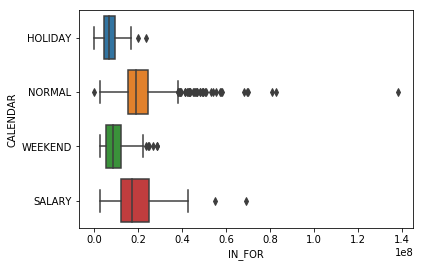

In [101]:
sns.boxplot(x='IN_FOR',y='CALENDAR', data=df, orient='h')

In [102]:
df1 = df

/Users/Daniyar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


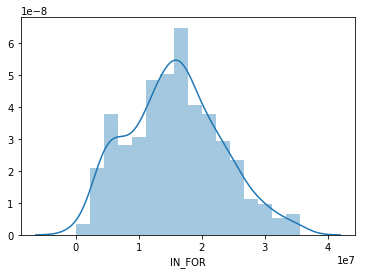

In [103]:
x1 = df1['IN_FOR'].std()*3

df1[df1['IN_FOR'] > x1].count()

df1 = df1[df1['IN_FOR'] < x1]

sns.distplot(df1['IN_FOR'])

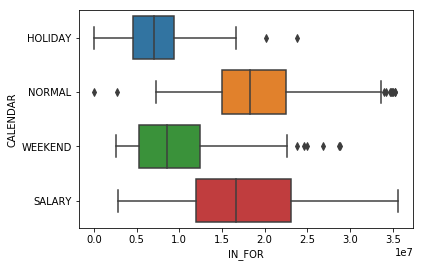

In [104]:
sns.boxplot(x='IN_FOR',y='CALENDAR', data=df1, orient='h')

In [105]:
df1.groupby('CALENDAR').count()['DATE']

CALENDAR
HOLIDAY     39
NORMAL     423
SALARY      37
WEEKEND    187
Name: DATE, dtype: int64

/Users/Daniyar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


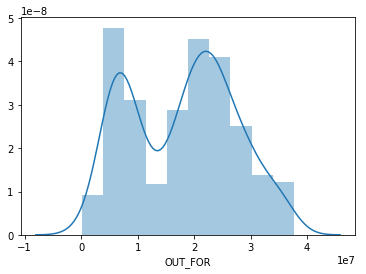

In [106]:
x1 = df1['OUT_FOR'].std()*3

df1[df1['OUT_FOR'] > x1].count()

df1 = df1[df1['OUT_FOR'] < x1]

sns.distplot(df1['OUT_FOR'])

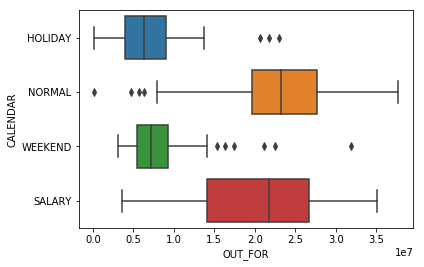

In [107]:
sns.boxplot(x='OUT_FOR',y='CALENDAR', data=df1, orient='h')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1dce2390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1dce2c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1dce2240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1dcc14e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1dcc1908>],
 'means': []}

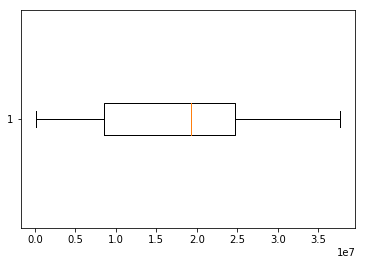

In [108]:
plt.boxplot(df1['OUT_FOR'],vert=False)

# Low and Normal activity 

In [127]:
df_xls = pd.read_excel('ts_new.xlsx')

In [128]:
df_xls['CHANGE_USD'] = change_currency_usd(df_xls)
df_xls['CHANGE_EUR'] = change_currency_eur(df_xls)
df_xls['USD_EUR_CHANGE'] = 'norm'
df_xls['USD_EUR_CHANGE'] = general_currency_change(df_xls)

In [129]:
df_xls.head()

,DATE,IN_FOR,OUT_FOR,IN_KZT,OUT_KZT,CALENDAR,CHANGE_USD,CHANGE_EUR,USD_EUR_CHANGE
0,2016-01-01,0,122953,1899647,1584705,LOW,norm,norm,norm
1,2016-01-02,2942,115059,2706416,2315761,LOW,norm,norm,norm
2,2016-01-03,263,147905,3548855,2971268,NORMAL,norm,norm,norm
3,2016-01-04,13533594,9363025,23528654,11716898,NORMAL,norm,norm,norm
4,2016-01-05,36769881,32769452,37289979,22565273,NORMAL,norm,norm,norm


In [130]:
df_xls.drop(['CHANGE_USD','CHANGE_EUR'],axis=1,inplace=True)

In [132]:
df_xls_dummies = pd.get_dummies(df_xls)

In [133]:
df_xls_dummies.head()

,DATE,IN_FOR,OUT_FOR,IN_KZT,OUT_KZT,CALENDAR_LOW,CALENDAR_NORMAL,USD_EUR_CHANGE_neg,USD_EUR_CHANGE_norm,USD_EUR_CHANGE_pos
0,2016-01-01,0,122953,1899647,1584705,1,0,0,1,0
1,2016-01-02,2942,115059,2706416,2315761,1,0,0,1,0
2,2016-01-03,263,147905,3548855,2971268,0,1,0,1,0
3,2016-01-04,13533594,9363025,23528654,11716898,0,1,0,1,0
4,2016-01-05,36769881,32769452,37289979,22565273,0,1,0,1,0


In [134]:
df_xls_dummies.columns

Index(['DATE', 'IN_FOR', 'OUT_FOR', 'IN_KZT', 'OUT_KZT', 'CALENDAR_LOW',
       'CALENDAR_NORMAL', 'USD_EUR_CHANGE_neg', 'USD_EUR_CHANGE_norm',
       'USD_EUR_CHANGE_pos'],
      dtype='object')

In [136]:
df_in_for = df_xls_dummies[['IN_FOR', 'CALENDAR_LOW',
                            'CALENDAR_NORMAL', 'USD_EUR_CHANGE_neg', 
                            'USD_EUR_CHANGE_norm','USD_EUR_CHANGE_pos']]

df_in_kzt = df_xls_dummies[['IN_KZT', 'CALENDAR_LOW',
                           'CALENDAR_NORMAL', 'USD_EUR_CHANGE_neg',
                           'USD_EUR_CHANGE_norm','USD_EUR_CHANGE_pos']]

df_out_for = df_xls_dummies[['OUT_FOR', 'CALENDAR_LOW',
       'CALENDAR_NORMAL', 'USD_EUR_CHANGE_neg', 'USD_EUR_CHANGE_norm',
       'USD_EUR_CHANGE_pos']]

df_out_kzt = df_xls_dummies[['OUT_KZT', 'CALENDAR_LOW',
       'CALENDAR_NORMAL', 'USD_EUR_CHANGE_neg', 'USD_EUR_CHANGE_norm',
       'USD_EUR_CHANGE_pos']]

In [138]:
x_in_for = df_in_for['IN_FOR'].std()*3
x_in_kzt = df_in_kzt['IN_KZT'].std()*3
x_out_for = df_out_for['OUT_FOR'].std()*3
x_out_kzt = df_out_kzt['OUT_KZT'].std()*3



#print(df_in_for[df_in_for['IN_FOR'] > x_in_for].count())
#print(df_in_kzt[df_in_kzt['IN_KZT'] > x_in_kzt].count())
#print(df_out_for[df_out_for['OUT_FOR'] > x_out_for].count())
#print(df_out_kzt[df_out_kzt['OUT_KZT'] > x_out_kzt].count())

df_in_for = df_in_for[df_in_for['IN_FOR'] < x_in_for]
df_in_kzt = df_in_kzt[df_in_kzt['IN_KZT'] < x_in_kzt]
df_out_for = df_out_for[df_out_for['OUT_FOR'] < x_out_for]
df_out_kzt = df_out_kzt[df_out_kzt['OUT_KZT'] < x_out_kzt]


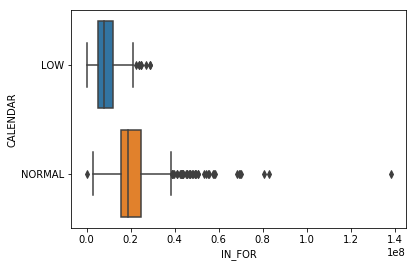

In [147]:
sns.boxplot(x='IN_FOR',y='CALENDAR', data=df_xls, orient='h')

In [143]:
model = LinearRegression()

# Prepare 2018 data

In [144]:
df_test = pd.read_excel('2018.xlsx')

In [145]:
df_test.head()

,DATE,CALENDAR_LOW,CALENDAR_NORMAL,CHANGE_USD_neg,CHANGE_USD_norm,CHANGE_USD_pos,CHANGE_EUR_neg,CHANGE_EUR_norm,CHANGE_EUR_pos
0,2018-01-01,1,0,0,1,0,0,1,0
1,2018-01-02,1,0,0,1,0,0,1,0
2,2018-01-03,0,1,0,1,0,0,1,0
3,2018-01-04,0,1,0,1,0,0,1,0
4,2018-01-05,0,1,0,1,0,0,1,0


# Build 4 different models

in_for

In [142]:
X_train = df_in_for.drop('IN_FOR',axis=1)
y_train = df_in_for['IN_FOR']

y_train.reset_index(drop=True,inplace=True)

model.fit(X_train, y_train)

prediction_in_for = model.predict()

0           0
1        2942
2         263
3    13533594
4    20162470
Name: IN_FOR, dtype: int64

in_kzt

In [ ]:
X_train = df_in_kzt.drop('IN_FOR',axis=1)
y_train = df_in_kzt['IN_FOR']

y_train.reset_index(drop=True,inplace=True)

model.fit(X_train, y_train)

prediction_in_for = model.predict()